In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('input/SolarPrediction.csv')
print(df.shape)
df.head()

(32686, 11)


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [2]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [3]:
# from pandas_profiling import ProfileReport
# ProfileReport(df).to_widgets()

In [4]:
df = df.sort_values(["UNIXTime"], ascending=True)
df.index = pd.to_datetime(df["UNIXTime"], unit = "s")
print(df.index)

DatetimeIndex(['2016-09-01 10:00:08', '2016-09-01 10:05:10',
               '2016-09-01 10:20:06', '2016-09-01 10:25:05',
               '2016-09-01 10:30:09', '2016-09-01 10:45:04',
               '2016-09-01 10:50:06', '2016-09-01 10:55:04',
               '2016-09-01 11:00:07', '2016-09-01 11:05:05',
               ...
               '2017-01-01 09:10:02', '2017-01-01 09:15:02',
               '2017-01-01 09:20:04', '2017-01-01 09:25:01',
               '2017-01-01 09:30:02', '2017-01-01 09:35:02',
               '2017-01-01 09:40:01', '2017-01-01 09:45:04',
               '2017-01-01 09:50:03', '2017-01-01 09:55:01'],
              dtype='datetime64[ns]', name='UNIXTime', length=32686, freq=None)


In [5]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 10:00:08,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 10:05:10,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 10:20:06,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 10:25:05,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 10:30:09,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [6]:
import pytz

HST = pytz.timezone('Pacific/Honolulu')
                                                                                ## unixtime is in utc
df.index = df.index.tz_localize(pytz.utc)                                       ## we can see that by comparing with "Time",
df.index = df.index.tz_convert(HST)                                             ## converting to hawaiian local time
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
UNIXTime,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00


In [7]:
df['DayOfYear'] = df.index.strftime('%j').astype(int)
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayOfYear
UNIXTime,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,245
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,245
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,245
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,245
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,245


In [8]:
df['TimeOfDay(s)'] = df.index.hour*60*60 + df.index.minute*60 + df.index.second
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,DayOfYear,TimeOfDay(s)
UNIXTime,,,,,,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,9/1/2016 12:00:00 AM,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,245,8
2016-09-01 00:05:10-10:00,1472724310,9/1/2016 12:00:00 AM,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,245,310
2016-09-01 00:20:06-10:00,1472725206,9/1/2016 12:00:00 AM,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,245,1206
2016-09-01 00:25:05-10:00,1472725505,9/1/2016 12:00:00 AM,00:25:05,2.21,51,30.43,103,144.12,18.00,06:07:00,18:38:00,245,1505
2016-09-01 00:30:09-10:00,1472725809,9/1/2016 12:00:00 AM,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,245,1809


'TimeOfDay(s)' and 'DayOfYear' extracts all the important features related to 'TimeSunRise', 'TimeSunSet', 'Data', 'Time', so we do not need them anymore. I tried to train the model with and without 'WindDirection(Degrees)', always gave a slightly better result without this feature, probably wind direction has little to no influence on the radiation, just my guess. Tried deleting other features too, only made the model worse, so keeping them in.

In [9]:
df.drop(['TimeSunRise','TimeSunSet', 'Data', 'Time', 'WindDirection(Degrees)'], inplace=True, axis=1)

df.head()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,Speed,DayOfYear,TimeOfDay(s)
UNIXTime,,,,,,,,
2016-09-01 00:00:08-10:00,1472724008,2.58,51,30.43,103,11.25,245,8
2016-09-01 00:05:10-10:00,1472724310,2.83,51,30.43,103,9.00,245,310
2016-09-01 00:20:06-10:00,1472725206,2.16,51,30.43,103,7.87,245,1206
2016-09-01 00:25:05-10:00,1472725505,2.21,51,30.43,103,18.00,245,1505
2016-09-01 00:30:09-10:00,1472725809,2.25,51,30.43,103,11.25,245,1809


In [10]:
print(df.shape)

(32686, 8)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
d= df.values
c = d[:, 2:8]
b = d[:,1]
bb = b.reshape(-1,1)
c.shape


def data_split(x, y):
    X_train_full, X_test , y_train_full, y_test = train_test_split(x, y , test_size = .2, random_state=42)
    X_train , X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = .2, random_state=42)

  

    X_train_sc = s.fit_transform(X_train)
    X_test_sc = s.fit_transform(X_test)
    X_valid_sc = s.fit_transform(X_valid)

    y_train_sc = s.fit_transform(y_train)
    y_test_sc = s.fit_transform(y_test)
    y_valid_sc = s.fit_transform(y_valid)


    print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)
    return X_train_sc,X_test_sc,X_valid_sc,y_train_sc,y_test_sc,y_valid_sc,y_test

X_train_sc,X_test_sc,X_valid_sc,y_train_sc,y_test_sc,y_valid_sc,y_test = data_split(c,bb)

from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential
from keras.optimizers import Adam

def model():
    model = Sequential()

    model.add(Flatten(input_shape = X_train_sc.shape[1:]))
    model.add(Dense(1024, activation = "relu",kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l = .001) ))
    model.add(Dropout(0.05))

    model.add(Dense(512, activation = "relu" , kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))

    model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))

    model.add(Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(0.1))



    model.add(Dense(128, activation="relu", kernel_regularizer=regularizers.l2(l = .001)))
    model.add(Dropout(.1))

    model.add(Dense(1, activation="linear"))
    
    model.compile(loss='mse',
              optimizer= "adam",
              metrics=['mae'])
    return model
    
model = model()
hist = model.fit(X_train_sc, y_train_sc,
                batch_size=32, epochs=50,
                validation_data=(X_valid_sc, y_valid_sc))

(20918, 6) (5230, 6) (6538, 6) (20918, 1) (5230, 1) (6538, 1)
Epoch 1/50
654/654 [==============================] - 21s 26ms/step - loss: 1.9453 - mae: 0.3442 - val_loss: 0.9202 - val_mae: 0.2506
Epoch 2/50
654/654 [==============================] - 18s 28ms/step - loss: 0.5945 - mae: 0.2521 - val_loss: 0.3801 - val_mae: 0.2291
Epoch 3/50
654/654 [==============================] - 21s 32ms/step - loss: 0.3029 - mae: 0.2193 - val_loss: 0.2344 - val_mae: 0.1793
Epoch 4/50
654/654 [==============================] - 15s 23ms/step - loss: 0.2228 - mae: 0.2063 - val_loss: 0.1948 - val_mae: 0.1756
Epoch 5/50
654/654 [==============================] - 16s 25ms/step - loss: 0.1959 - mae: 0.2041 - val_loss: 0.1821 - val_mae: 0.1910
Epoch 6/50
654/654 [==============================] - 16s 24ms/step - loss: 0.1820 - mae: 0.2009 - val_loss: 0.1639 - val_mae: 0.1685
Epoch 7/50
654/654 [==============================] - 14s 21ms/step - loss: 0.1741 - mae: 0.1980 - val_loss: 0.1626 - val_mae: 0.1825


#### here we can see our model works very good compare to other model which we see below...see i will suggest we can go with this model 

In [14]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

print(model.evaluate(X_test_sc, y_test_sc))
scaler_y = s.fit(bb)
y_predict_sc = model.predict(X_test_sc)
y_predict = scaler_y.inverse_transform(y_predict_sc)
def model_result(y_test, y_predict):
    print(f'r2_score is {r2_score(y_test, y_predict)}')
    print(f'Mean square error is {mean_squared_error(y_test, y_predict)}')
    print(f'explained_variance_score is {explained_variance_score(y_test, y_predict)}')
    
model_result(y_test, y_predict)

205/205 [==============================] - 1s 5ms/step - loss: 0.1258 - mae: 0.1544
[0.1258251667022705, 0.15439479053020477]
205/205 [==============================] - 1s 4ms/step
r2_score is 0.8990415793118101
Mean square error is 9816.308163380818
explained_variance_score is 0.8993857217262057


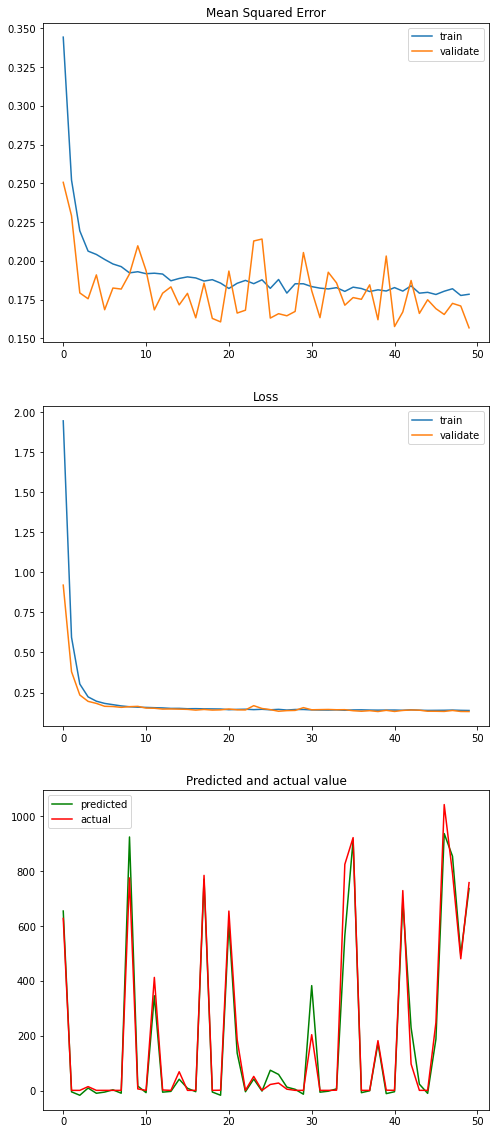

In [15]:
def plot(model, y_predict, y_test):
    fig, [ax, ax1, ax2] = plt.subplots(3,1, figsize = (8, 20))

    ax.set_title('Mean Squared Error')
    ax.plot(model.history['mae'], label='train')
    ax.plot(model.history['val_mae'], label='validate')
    ax.legend()

    ax1.set_title('Loss')
    ax1.plot(model.history['loss'], label='train')
    ax1.plot(model.history['val_loss'], label='validate')
    ax1.legend()
    axis_x = [i for i in range(50)]
    
    ax2.set_title("Predicted and actual value")
    ax2.plot(axis_x,y_predict[:50], label = "predicted", color = "green")
    ax2.plot(axis_x, y_test[:50], label = "actual",color = "red")
    ax2.legend()
    
plot(hist,y_predict, y_test)

# Try Some different combination


In [17]:
from sklearn import preprocessing


d= df.values
c = d[:, 2:8]
b = d[:,1]
bb = b.reshape(-1,1)
c.shape

from sklearn.preprocessing import StandardScaler
s = StandardScaler()
scaler_x = s.fit(c)
scaler_Y = s.fit(bb)
X_scale = s.fit(c).transform(c)


from sklearn.model_selection import train_test_split
X_train, X_test_val , y_train, y_test_val = train_test_split(X_scale, bb , test_size = 0.2)
X_valid , X_test, y_valid, y_test = train_test_split(X_test_val, y_test_val, test_size = 0.5)



y_train_sc = s.fit_transform(y_train)
y_test_sc = s.fit_transform(y_test)
y_valid_sc = s.fit_transform(y_valid)


print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)




from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential


model = Sequential()


model.add(Dense(64, activation = "relu", input_shape = (6,), kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l=.01)))
model.add(Dropout(0.1))


model.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(l=.001)))
model.add(Dropout(0.1))

model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l=.010)))
model.add(Dropout(0.1))

model.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(l=.001)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l=.001)))

model.add(Dense(1, activation="linear"))




from keras.optimizers import Adam

#optimizer = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train, y_train_sc,
                batch_size=32, epochs=15,
                validation_data=(X_valid, y_valid_sc))






(26148, 6) (3269, 6) (3269, 6) (26148, 1) (3269, 1) (3269, 1)
Epoch 1/15
818/818 [==============================] - 5s 5ms/step - loss: 1.2635 - mae: 0.3209 - val_loss: 0.5175 - val_mae: 0.2543
Epoch 2/15
818/818 [==============================] - 5s 6ms/step - loss: 0.3865 - mae: 0.2399 - val_loss: 0.2662 - val_mae: 0.1922
Epoch 3/15
818/818 [==============================] - 5s 6ms/step - loss: 0.2493 - mae: 0.2150 - val_loss: 0.2715 - val_mae: 0.2589
Epoch 4/15
818/818 [==============================] - 6s 7ms/step - loss: 0.2107 - mae: 0.2073 - val_loss: 0.1787 - val_mae: 0.2018
Epoch 5/15
818/818 [==============================] - 5s 6ms/step - loss: 0.1971 - mae: 0.2065 - val_loss: 0.1760 - val_mae: 0.1725
Epoch 6/15
818/818 [==============================] - 6s 7ms/step - loss: 0.1876 - mae: 0.2015 - val_loss: 0.1773 - val_mae: 0.1870
Epoch 7/15
818/818 [==============================] - 3s 4ms/step - loss: 0.1823 - mae: 0.2015 - val_loss: 0.1688 - val_mae: 0.1722
Epoch 8/15
818

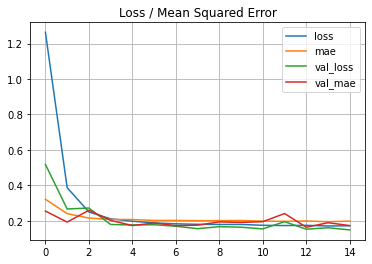

In [18]:
from matplotlib import pyplot as plt
pd.DataFrame(hist.history).plot()
plt.title('Loss / Mean Squared Error')
plt.grid(True);

In [12]:
from sklearn import preprocessing


d= df.values
c = d[:, 2:8]
b = d[:,1]
bb = b.reshape(-1,1)
c.shape

from sklearn.preprocessing import StandardScaler
s = StandardScaler()


from sklearn.model_selection import train_test_split
X_train, X_test_val , y_train, y_test_val = train_test_split(c, bb , test_size = 0.2, random_state=0)
X_valid , X_test, y_valid, y_test = train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state=0)




X_train_sc = s.fit_transform(X_train)
X_test_sc = s.fit_transform(X_test)
X_valid_sc = s.fit_transform(X_valid)

y_train_sc = s.fit_transform(y_train)
y_test_sc = s.fit_transform(y_test)
y_valid_sc = s.fit_transform(y_valid)


print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)




from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential


model = Sequential()


model.add(Dense(64, activation = "relu", input_shape = (6,), kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l=.01)))
# model.add(Dropout(.1))


model.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(l=.001)))
# model.add(Dropout(0.1))

model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l=.01)))
# model.add(Dropout(0.1))

model.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(l=.001)))
# model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l=.001)))

model.add(Dense(1, activation="linear"))



model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train_sc, y_train_sc,
                batch_size=32, epochs=15,
                validation_data=(X_valid_sc, y_valid_sc))






(26148, 6) (3269, 6) (3269, 6) (26148, 1) (3269, 1) (3269, 1)
Epoch 1/15
818/818 [==============================] - 7s 7ms/step - loss: 1.1950 - mae: 0.2568 - val_loss: 0.4852 - val_mae: 0.1949
Epoch 2/15
818/818 [==============================] - 5s 6ms/step - loss: 0.3531 - mae: 0.1939 - val_loss: 0.3204 - val_mae: 0.2553
Epoch 3/15
818/818 [==============================] - 4s 5ms/step - loss: 0.2345 - mae: 0.1890 - val_loss: 0.1977 - val_mae: 0.1610
Epoch 4/15
818/818 [==============================] - 5s 6ms/step - loss: 0.1940 - mae: 0.1791 - val_loss: 0.2187 - val_mae: 0.2197
Epoch 5/15
818/818 [==============================] - 6s 8ms/step - loss: 0.1787 - mae: 0.1778 - val_loss: 0.1695 - val_mae: 0.1715
Epoch 6/15
818/818 [==============================] - 7s 8ms/step - loss: 0.1676 - mae: 0.1741 - val_loss: 0.1594 - val_mae: 0.1714
Epoch 7/15
818/818 [==============================] - 6s 8ms/step - loss: 0.1622 - mae: 0.1733 - val_loss: 0.1835 - val_mae: 0.2174
Epoch 8/15
818

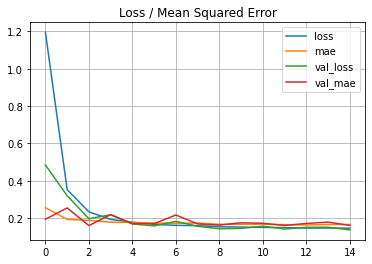

In [13]:
from matplotlib import pyplot as plt
pd.DataFrame(hist.history).plot()
plt.title('Loss / Mean Squared Error')
plt.grid(True);

In [14]:
y_predict_sc = model.predict(X_test_sc)
y_sc = s.fit(bb)
y_predict = y_sc.inverse_transform(y_predict_sc)
y_predict

103/103 [==============================] - 1s 4ms/step


array([[544.2399    ],
       [  1.6098506 ],
       [  3.322024  ],
       ...,
       [  0.72021747],
       [ 18.120455  ],
       [710.91187   ]], dtype=float32)

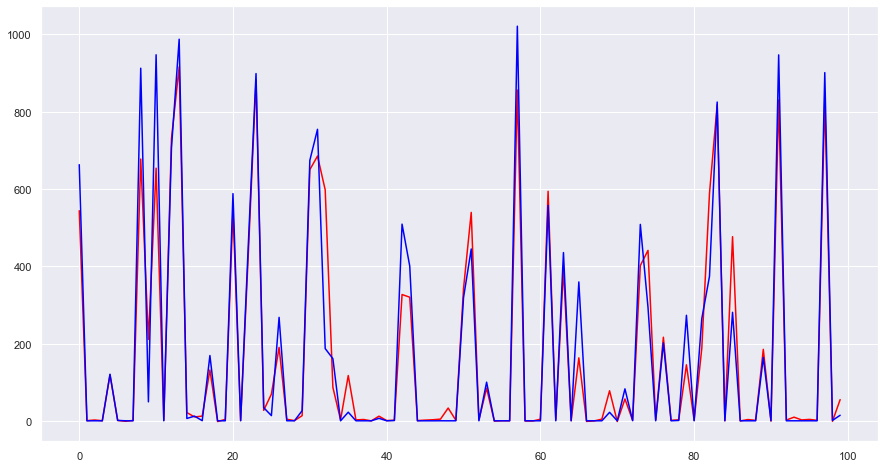

In [19]:
import seaborn as sns
sns.set(rc = {"figure.figsize":(15, 8)})
plt.plot(range(100), y_predict[:100], label = "predicted", color = "red")
plt.plot(range(100), y_test[:100], label = "actual", color = "blue")


In [21]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
print(f'explained_variance_score, {explained_variance_score(y_test, y_predict)}')
print(f'r2_score, {r2_score(y_test, y_predict)}')
print(f'MSE, {mean_squared_error(y_test, y_predict)}')

explained_variance_score, 0.8859872684339889
r2_score, 0.8834153112519498
MSE, 11919.864083799932


In [114]:
from sklearn import preprocessing


d= df.values
c = d[:, 2:8]
b = d[:,1]
bb = b.reshape(-1,1)
c.shape

from sklearn.preprocessing import StandardScaler
s = StandardScaler()



from sklearn.model_selection import train_test_split
X_train_full, X_test , y_train_full, y_test = train_test_split(c, bb , test_size = 0.2)
X_train , X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2)




X_train_sc = s.fit_transform(X_train)
X_test_sc = s.fit_transform(X_test)
X_valid_sc = s.fit_transform(X_valid)

y_train_sc = s.fit_transform(y_train)
y_test_sc = s.fit_transform(y_test)
y_valid_sc = s.fit_transform(y_valid)


print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)




from keras.layers import Dense,Dropout, Flatten
from keras import regularizers
from keras.models import Sequential


model = Sequential()


model.add(Dense(64, activation = "relu", input_shape = (6,), kernel_initializer="HeNormal", kernel_regularizer=regularizers.l2(l=.01)))
model.add(Dropout(.1))


model.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(l=.001)))
model.add(Dropout(0.1))

model.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(l=.01)))
model.add(Dropout(0.1))

model.add(Dense(128, activation = "relu", kernel_regularizer=regularizers.l2(l=.01)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(l=.001)))

model.add(Dense(1, activation="linear"))




from keras.optimizers import Adam

#optimizer = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train_sc, y_train_sc,
                batch_size=32, epochs=15,
                validation_data=(X_valid_sc, y_valid_sc))


(20918, 6) (5230, 6) (6538, 6) (20918, 1) (5230, 1) (6538, 1)
Epoch 1/15
654/654 [==============================] - 4s 5ms/step - loss: 1.6834 - mae: 0.3326 - val_loss: 0.6471 - val_mae: 0.2424
Epoch 2/15
654/654 [==============================] - 3s 4ms/step - loss: 0.4794 - mae: 0.2501 - val_loss: 0.3267 - val_mae: 0.2026
Epoch 3/15
654/654 [==============================] - 3s 4ms/step - loss: 0.3025 - mae: 0.2282 - val_loss: 0.2417 - val_mae: 0.1910
Epoch 4/15
654/654 [==============================] - 3s 5ms/step - loss: 0.2467 - mae: 0.2163 - val_loss: 0.2163 - val_mae: 0.2103
Epoch 5/15
654/654 [==============================] - 3s 5ms/step - loss: 0.2244 - mae: 0.2147 - val_loss: 0.2113 - val_mae: 0.2325
Epoch 6/15
654/654 [==============================] - 3s 5ms/step - loss: 0.2112 - mae: 0.2115 - val_loss: 0.1911 - val_mae: 0.1828
Epoch 7/15
654/654 [==============================] - 3s 5ms/step - loss: 0.2036 - mae: 0.2075 - val_loss: 0.1876 - val_mae: 0.1812
Epoch 8/15
654

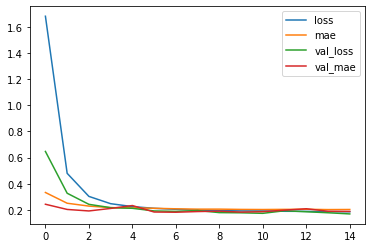

In [115]:
pd.DataFrame(hist.history).plot();

In [116]:
model.evaluate(X_test_sc, y_test_sc)

205/205 [==============================] - 1s 3ms/step - loss: 0.1561 - mae: 0.1748


[0.15609319508075714, 0.17483043670654297]

In [117]:
scaler_y = s.fit(bb)

y_predict_sc = model.predict(X_test_sc)
y_predict = scaler_y.inverse_transform(y_predict_sc)

205/205 [==============================] - 0s 2ms/step


In [118]:
y_test.reshape(y_predict.shape)

array([[  1.17],
       [305.46],
       [  1.22],
       ...,
       [ 75.18],
       [673.29],
       [  1.25]])

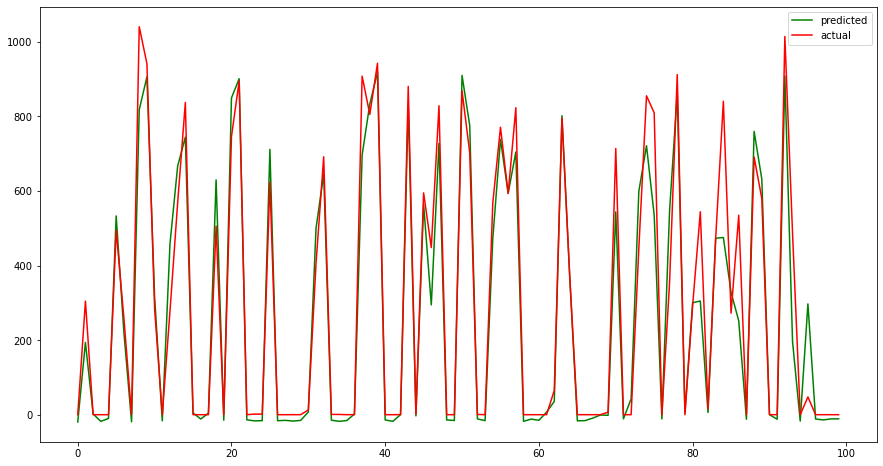

In [150]:
axis_x = [i for i in range(100)]

plt.plot(axis_x,y_predict[:100], label = "predicted", color = "green")
plt.plot(axis_x, y_test[:100], label = "actual",color = "red")
plt.legend()



In [76]:
y_valid

array([[  1.69],
       [826.05],
       [  1.22],
       ...,
       [  1.23],
       [907.3 ],
       [548.56]])

In [33]:
dataset = df.values

X = dataset[:,2:8]
Y = dataset[:,1]
Y = Y.reshape(-1,1)


print(X.shape)
print(Y.shape)
print(type(X))

(32686, 6)
(32686, 1)
<class 'numpy.ndarray'>


In [34]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


scaler_X = preprocessing.StandardScaler().fit(X)
scaler_Y = preprocessing.StandardScaler().fit(Y)
X_scale = scaler_X.transform(X)
X_train, X_val_and_test, Y_train_unscaled, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val_unscaled, Y_test_unscaled = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
Y_train = scaler_Y.transform(Y_train_unscaled)
Y_val =  scaler_Y.transform(Y_val_unscaled)
Y_test =  scaler_Y.transform(Y_test_unscaled)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(26148, 6) (3269, 6) (3269, 6) (26148, 1) (3269, 1) (3269, 1)


Still a moderately shallow network. Added some Dropout and L2 regularizers, without which the model was getting overfit to the training data. I am a very beginner in neural networks, this whole network is actually built from intuitions, any suggestions would be very great.

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


## kernel_initializer='normal'


model = Sequential()
model.add(Dense(64, activation='relu',  kernel_initializer='normal', input_shape=(6,), kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l=0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

In [36]:
from keras.optimizers import Adam

#optimizer = Adam(lr=1e-3, decay=1e-3 / 200)

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=30,
                validation_data=(X_val, Y_val))

Epoch 1/30
818/818 [==============================] - 4s 5ms/step - loss: 0.6850 - mae: 0.2917 - val_loss: 0.2210 - val_mae: 0.1908
Epoch 2/30
818/818 [==============================] - 3s 4ms/step - loss: 0.2537 - mae: 0.2372 - val_loss: 0.2227 - val_mae: 0.1967
Epoch 3/30
818/818 [==============================] - 4s 4ms/step - loss: 0.2504 - mae: 0.2381 - val_loss: 0.2024 - val_mae: 0.1855
Epoch 4/30
818/818 [==============================] - 5s 6ms/step - loss: 0.2401 - mae: 0.2303 - val_loss: 0.1953 - val_mae: 0.1713
Epoch 5/30
818/818 [==============================] - 4s 5ms/step - loss: 0.2358 - mae: 0.2290 - val_loss: 0.1942 - val_mae: 0.1924
Epoch 6/30
818/818 [==============================] - 4s 5ms/step - loss: 0.2348 - mae: 0.2290 - val_loss: 0.2084 - val_mae: 0.1872
Epoch 7/30
818/818 [==============================] - 3s 4ms/step - loss: 0.2339 - mae: 0.2302 - val_loss: 0.2249 - val_mae: 0.2006
Epoch 8/30
818/818 [==============================] - 3s 4ms/step - loss: 0.

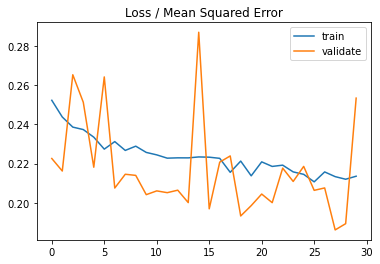

In [82]:
from matplotlib import pyplot

pyplot.title('Loss / Mean Squared Error')
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='validate')
pyplot.legend()
pyplot.show()

In [83]:
model.evaluate(X_test, Y_test)

103/103 [==============================] - 0s 2ms/step - loss: 0.2366 - mae: 0.2402


[0.23656168580055237, 0.24015501141548157]

In [85]:
Y_result_scaled= model.predict(X_test)
Y_result = scaler_Y.inverse_transform(Y_result_scaled)
print(Y_result)
print(Y_test_unscaled.reshape(Y_result.shape))

103/103 [==============================] - 0s 2ms/step
[[788.78864 ]
 [ 14.145633]
 [ 14.102923]
 ...
 [982.3673  ]
 [ 14.102923]
 [ 14.102923]]
[[140.13]
 [  1.24]
 [  1.89]
 ...
 [935.21]
 [  1.21]
 [  1.24]]


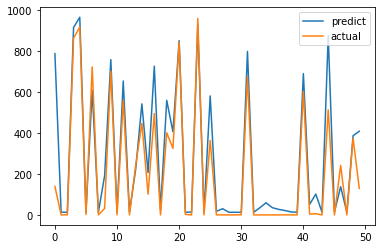

In [86]:
import numpy as np

axis_x = [i for i in range(50)]


pyplot.plot(axis_x, Y_result[:50], label='predict')
pyplot.plot(axis_x, Y_test_unscaled[:50], label='actual')
pyplot.legend()
pyplot.show()

In [87]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score


explained_variance_score = explained_variance_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
mean_squared_error = mean_squared_error(Y_test_unscaled.reshape(Y_result.shape), Y_result)
r_squared = r2_score(Y_test_unscaled.reshape(Y_result.shape), Y_result)
print('explained variance = {}'.format(explained_variance_score))
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

explained variance = 0.856142110927528
mse = 17877.714430634187
r2 = 0.8212558027316987


This is probably not a very bad model afterall for a small dataset!!

In [ ]:
# model.save('solar.h5')